In [3]:
# Bibliotecas usadas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
# Carregando os dados tratados na semana 1
df_telco_customer = pd.read_csv('https://raw.githubusercontent.com/SilvioCSOliveira/ChallengeDataScience2022AluraVoz/main/df_telco_customer_ajustada.csv',sep=';')
df_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   IdCliente                 7043 non-null   object 
 2   ClienteCancelado          7043 non-null   object 
 3   Genero                    7043 non-null   object 
 4   Maior65                   7043 non-null   object 
 5   Parceiro(a)               7043 non-null   object 
 6   Dependentes               7043 non-null   object 
 7   TempoContrato(m)          7043 non-null   int64  
 8   ServiçoTelefônico         7043 non-null   object 
 9   MultiplasLinhas           7043 non-null   object 
 10  ServicoInternet           7043 non-null   object 
 11  AdicinalSegurancaOnline   7043 non-null   object 
 12  AdicionalBackup           7043 non-null   object 
 13  AdicionalProtDispositivo  7043 non-null   object 
 14  Adiciona

In [5]:
# Analisando 

print("Temos um total de " + str( df_telco_customer['IdCliente'].count()) )
# Temos um total de 7043 clientes da Alura Voz
x = df_telco_customer.query("ClienteCancelado=='Yes'")
print("E deste total " + str(x['IdCliente'].count()) + ' cancelaram sua assinatura.' )


Temos um total de 7043
E deste total 1869 cancelaram sua assinatura.


Agora vamos analisar os dados qualitativos e quantitativos dos Clientes para tentar encontrar alguma que nos ajude a entender os motivos dos cancelamentos.

Qualitativos:
- Genero                    
- Maior65                   
- Parceiro(a)               
- Dependentes               
- TipoContrato              
- FaturaDigital             
- FormaPagamento            
- ServiçoTelefônico         
	- MultiplasLinhas           
- ServicoInternet           
	- AdicinalSegurancaOnline   
	- AdicionalBackup           
	- AdicionalProtDispositivo  
	- AdicionalSuporte          
- AssinaturaTv              
	- AssinaturaFilmes          

Quantitativos:
- TempoContrato(m)          
- GastoMensal               
- GastoTotal                
- GastoDiarioMedio          



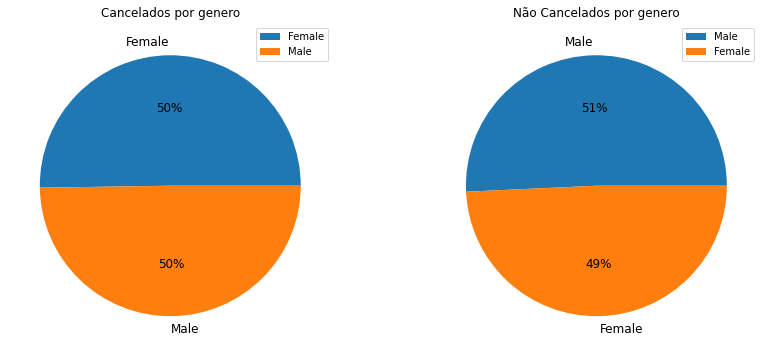

In [25]:
# Analisando os dados Qualitativos, inciando por genero

# Dividir os cancelados e não cancelados em dois dataframes para possibilitar verificar se proporcionalmente há diferença nos dados qualitativos
# entre os Clientes que cancelaram e os que não cancelaram
df_telco_customer_churn = df_telco_customer.query('ClienteCancelado == "Yes"')
df_telco_customer_nao_churn = df_telco_customer.query('ClienteCancelado == "No"')
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Genero"].value_counts().values
labels = df_telco_customer_churn["Genero"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},)  #,colors =["#6a8ee8", "#424ad1"]
plt.title('Cancelados por genero')
plt.legend()


count_nc = df_telco_customer_nao_churn["Genero"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Genero"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},)  #,colors =["#6a8ee8", "#424ad1"]
plt.title('Não Cancelados por genero')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação no genero com os cancelamentos.

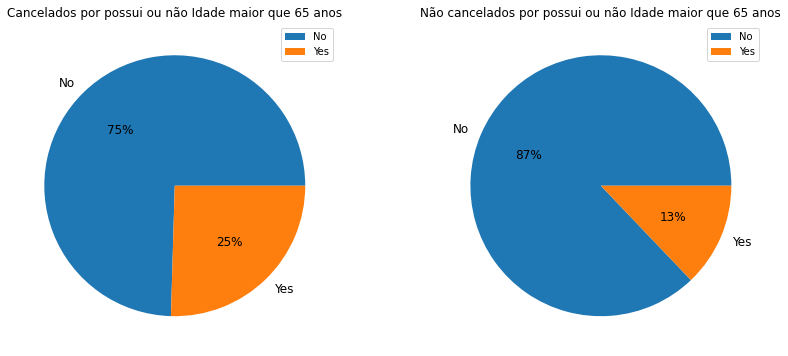

In [26]:
# Analisando os dados Qualitativos coluna Maior65
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Maior65"].value_counts().values
labels = df_telco_customer_churn["Maior65"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Idade maior que 65 anos')
plt.legend()

count_nc = df_telco_customer_nao_churn["Maior65"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Maior65"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não cancelados por possui ou não Idade maior que 65 anos')
plt.legend()

Como demonstra o gráfico acima, não há diferença percentual significativa entre as faixas de idade para clientes que cancelaram ou não que indique alguma correlação com os cancelamentos.

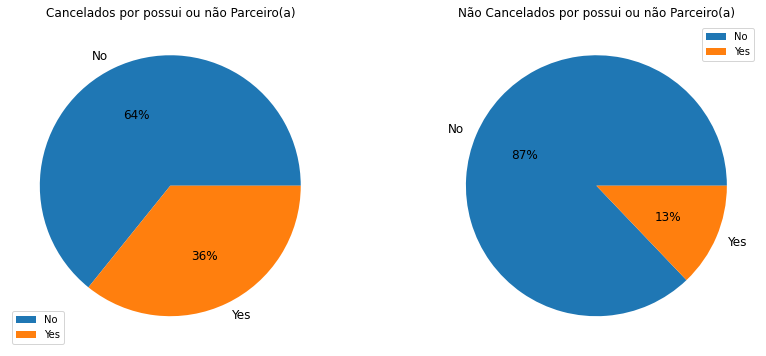

In [27]:
# Analisando os dados Qualitativos, coluna Parceiro(a)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Parceiro(a)"].value_counts().values
labels = df_telco_customer_churn["Parceiro(a)"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Parceiro(a)')
plt.legend()

count_nc = df_telco_customer_nao_churn["Maior65"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Maior65"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por possui ou não Parceiro(a)')
plt.legend()

Como demonstra o gráfico acima, há diferença percentual significativa entre os clientes que possuem parceiro(a) que cancelaram, **o que indica correlação entre o cancelamento e o cliente possuir parceiro(a)**

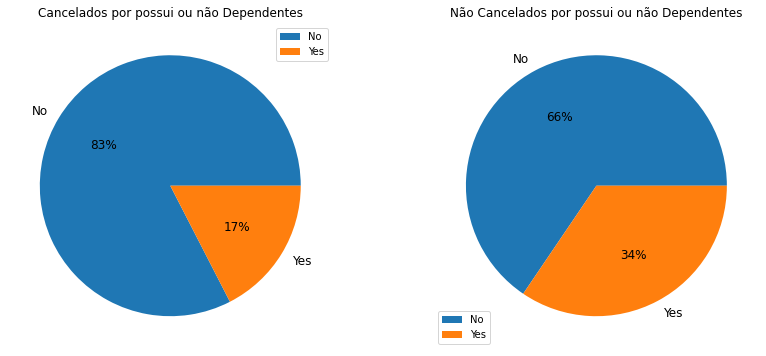

In [28]:
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Dependentes"].value_counts().values
labels = df_telco_customer_churn["Dependentes"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Dependentes')
plt.legend()

count_nc = df_telco_customer_nao_churn["Dependentes"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Dependentes"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por possui ou não Dependentes')
plt.legend()

Como demonstra o gráfico acima, não há diferença percentual significativa entre os clientes que possuem ou não dependentes, que cancelaram ou não que indique alguma correlação com os cancelamentos.

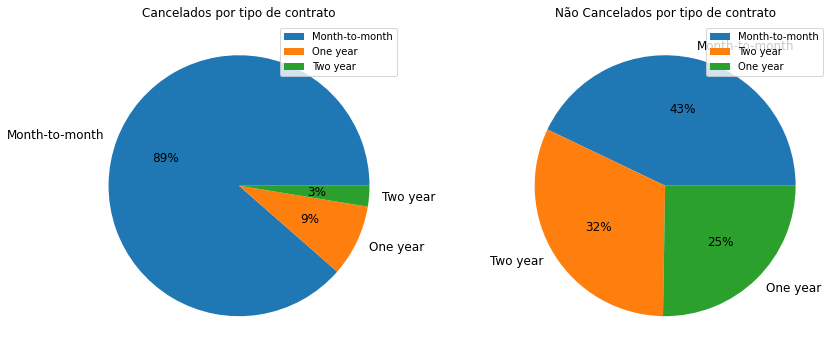

In [29]:
campo = 'TipoContrato'
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por tipo de contrato')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por tipo de contrato')
plt.legend()

incluir Explicação

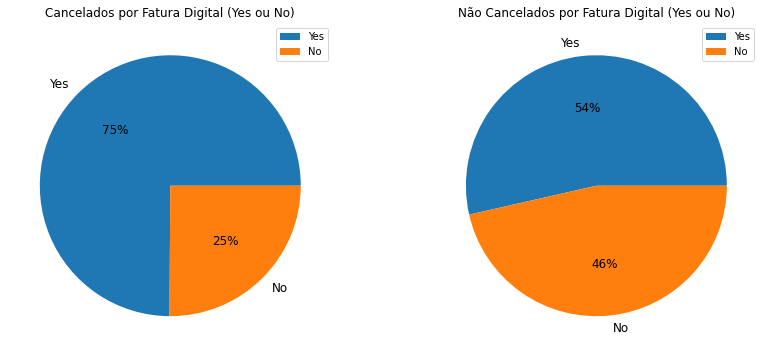

In [30]:
campo = 'FaturaDigital'
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Fatura Digital (Yes ou No)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Fatura Digital (Yes ou No)')
plt.legend()

incluir explicação não correlação